<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-aleislasb/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)







---


# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [6]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
#Se obtienen los valores de D y W.
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)
#Se denominan los valores de las variables W, Winv, D.
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#Se realiza una multiplicacion de punto por ser una matriz, en la cual las tres variables son multiplicables.
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [10]:
import numpy as np
from numpy import array
from numpy.linalg import eig

A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")
#Para poder tener la verificación de la matriz que es igual a A, se convierte a número real y después de esto, se redondea.
B= np.round(np.dot(np.dot(W,D),Winv)).real
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [13]:
#Matriz 1.
import numpy as np
from numpy import array
from numpy.linalg import eig

A = array([[0, 4, 0], [9, 0, 0], [2, 2, 2]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B= np.round(np.dot(np.dot(W,D),Winv)).real
print(B)
print("-----------------------------")

-------Matriz original-------
[[0 4 0]
 [9 0 0]
 [2 2 2]]
-----------------------------
[ 2.  6. -6.]
[[ 0.          0.45584231  0.55337157]
 [ 0.          0.68376346 -0.83005736]
 [ 1.          0.56980288  0.06917145]]
-------Matriz reconstruida-------
[[-0.  4.  0.]
 [ 9.  0.  0.]
 [ 2.  2.  2.]]
-----------------------------


In [15]:
#Matriz 2. 
import numpy as np
from numpy import array
from numpy.linalg import eig

A = array([[9, 4, 5], [2, 9, 6], [4, 7, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[9 4 5]
 [2 9 6]
 [4 7 9]]
-----------------------------
[18.36608366  6.36814263  2.26577371]
[[-0.56430492 -0.87868989 -0.19687766]
 [-0.52738658  0.469399   -0.61896952]
 [-0.63515616  0.08699809  0.76033935]]
-------Matriz reconstruida-------
[[9. 4. 5.]
 [2. 9. 6.]
 [4. 7. 9.]]
-----------------------------


In [20]:
#Matriz 3
import numpy as np
from numpy import array
from numpy.linalg import eig

A = array([[5, 6, 2], [2, 5, 8], [5, 3, 8]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = eig(A)
print(values) #D
print(vectors) #W

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B= np.round(np.dot(np.dot(W,D),Winv)).real
print(B)
print("-----------------------------")

-------Matriz original-------
[[5 6 2]
 [2 5 8]
 [5 3 8]]
-----------------------------
[14.87409265+0.j          1.56295367+3.17208768j  1.56295367-3.17208768j]
[[ 0.49426917+0.j          0.70255962+0.j          0.70255962-0.j        ]
 [ 0.60548859+0.j         -0.32674155+0.48391762j -0.32674155-0.48391762j]
 [ 0.62376402+0.j         -0.22714031-0.33746252j -0.22714031+0.33746252j]]
-------Matriz reconstruida-------
[[5. 6. 2.]
 [2. 5. 8.]
 [5. 3. 8.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


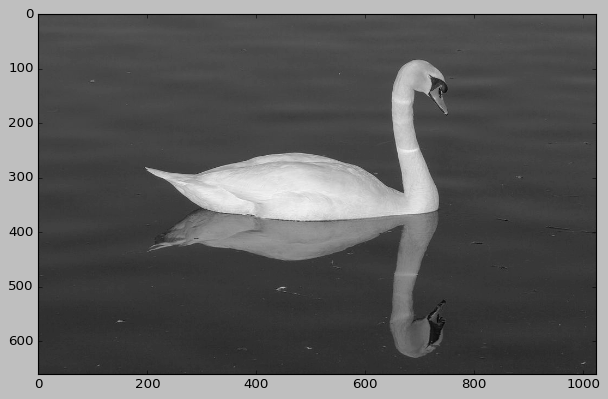

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FD9B46014D0>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

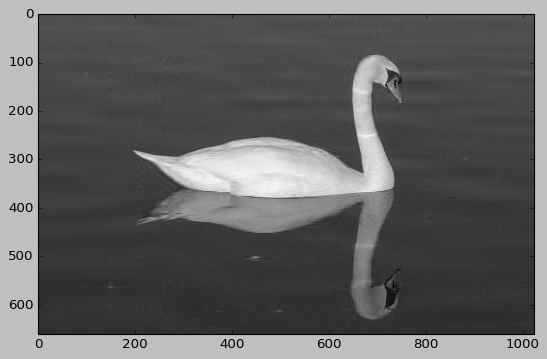

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[255. 255. 255. ... 251. 228. 242.]


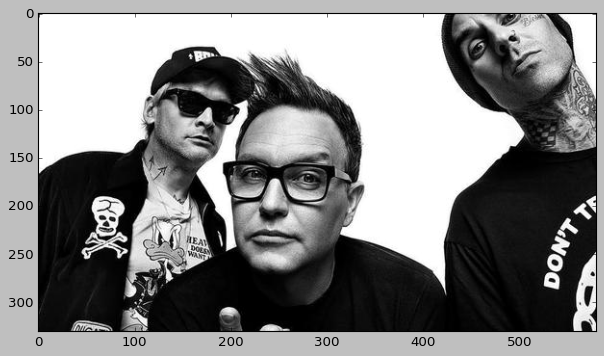

<PIL.Image.Image image mode=LA size=580x330 at 0x7FD9B24C4890>


In [24]:
#imagen 1
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://elcomercio.pe/resizer/YkYv3VLXvNNHqtO4imgUuo4Bp64=/580x330/smart/filters:format(jpeg):quality(75)/cloudfront-us-east-1.images.arcpublishing.com/elcomercio/OXPIXXEOKBHDJCPFYCRO4AG6ZI.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [25]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(330, 580)

In [26]:
U.shape

(330, 330)

In [27]:
V.shape

(580, 580)

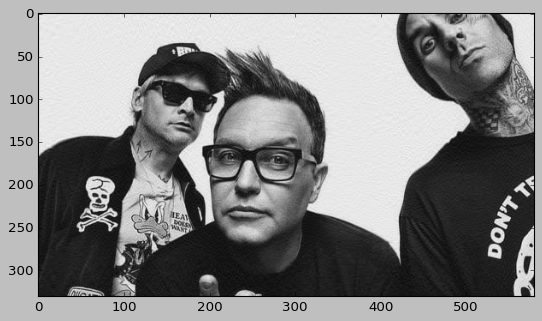

Felicidades la imagen está comprimida


In [36]:
nvalue = 130
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[255. 255. 255. ...   4.   4.   4.]


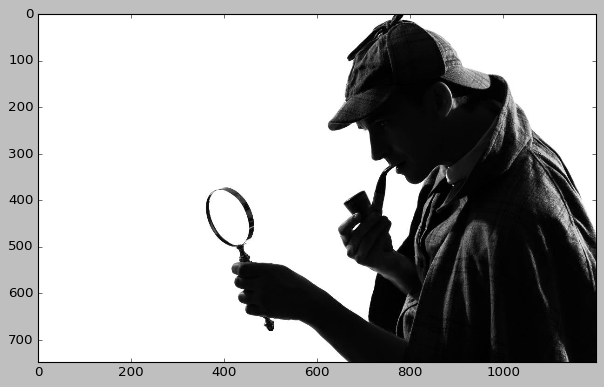

<PIL.Image.Image image mode=LA size=1200x747 at 0x7FD9B2383410>


In [37]:
#imagen 2
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://librotea.com/wp-content/uploads/2022/06/27/17/18/Sherlock_Holmes_detectives_Libros.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [38]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(747, 1200)

In [39]:
U.shape

(747, 747)

In [40]:
V.shape

(1200, 1200)

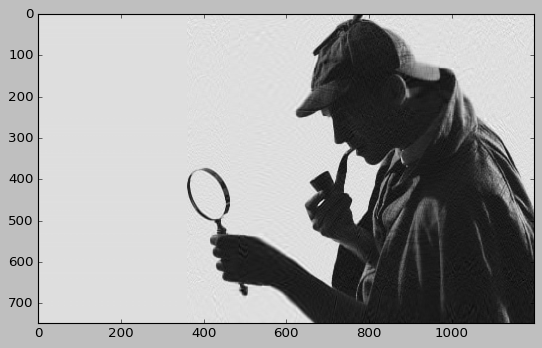

Felicidades la imagen está comprimida


In [46]:
nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[223. 225. 226. ... 233. 235. 234.]


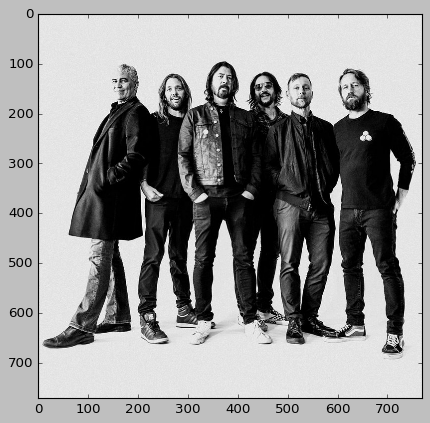

<PIL.Image.Image image mode=LA size=770x770 at 0x7FD9B23F6C10>


In [47]:
#imagen 3
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://lastfm.freetls.fastly.net/i/u/770x0/c6df009374629ac978c8207e6a369d6d.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [48]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(770, 770)

In [49]:
U.shape

(770, 770)

In [50]:
V.shape

(770, 770)

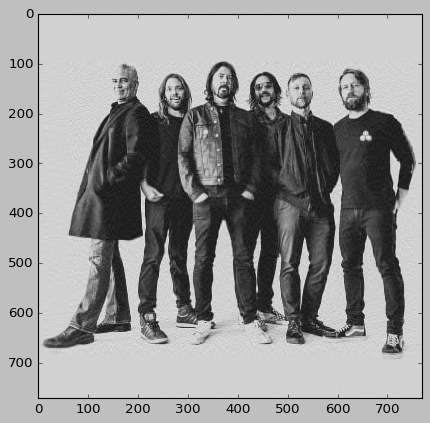

Felicidades la imagen está comprimida


In [56]:
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




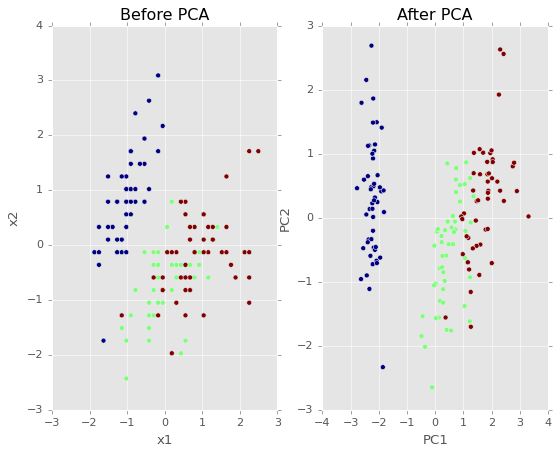

In [59]:
#In this example we are using a iris dataset, on which we are reviewing all data, identified by the variables that we are already given to the model.
#The purpose of this is to clasify different characteristics.
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [61]:
#Due to the PCA Analysis we have the results on which two components are the most relevant to this dataset, the first one is about 73% and the second one 22%)
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


In [73]:
#On a model we can also calculate the highest value of variance that we are going to have, this can be seen estimating the covariance. On which our values are the diagonal ones.
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [74]:
#Verified by the following formula, showing that this is the variable that the model has.
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [64]:
#With the eigenvectors we can know the importance of each component involved, on which a higher value represents a higher importance.
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


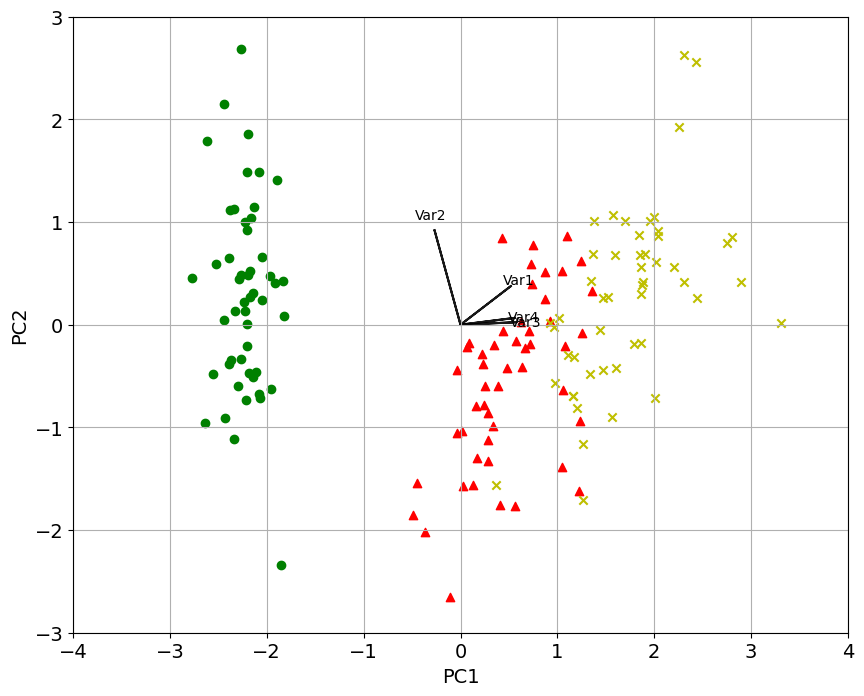

In [75]:
#With the biplot we can represent two things, the behavior of the information and also the principal components that involves all the complete dataset.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Lo más importante del ejercicio fue el como saber la horientación con respecto a detectar las variables que son importantes para el modelo y cuales no. Descubrí que depende del impacto que se tenga, que tantas variables estaremos usando y como hacemos que sea representativo para el completo conjunto de datos.

¿Qué es feature importance y para que nos sirve?

El feature importance determina las variables o características que tienen una mayor influencia dentro de nuestro conjunto de datos, en otras palabras, hasta que nivel de componentes podemos decir que hemos cubierto la mayor parte de información de nuestro dataset, esto nos funciona para tomar lo que más enriquece a nuestro modelo y poder hacer modelos predictivos considerando la mayor cantidad de impacto y hablando de la mayor cantidad de datos, pudiéndonos enfocar en el correcto modelaje y omitiendo esas partes que hacen mas cansado nuestro proceso-producto.


¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Los hallazgos más importantes fue en como es importante llegar a un punto medio en los datos, en los cuales debemos de recopilar los suficientes, no menos para interrumpir lo que queremos ver y no más para sobreprocesar nuestro modelo, imagen o gráfica. 
De igual manera en las distintas maneras que se tienen para la visualización de datos grandes, ya que esto representa los primeros pasos para partir de un sistema.


¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Considero que serviría de primera instancia para la creación de sitios, el modelo predictivo del comportamiento de distintas cosas, desgaste de una pieza, comportamiento de un producto, considerando las características importantes y que variables representan la mayor variación de todo mi modelo
